# Part 2
## Data Analysis

In [77]:
import numpy as np
import skimage 
import pandas  as pd
import matplotlib.pyplot as plt

### Exercise 2.1.1 
#### Reading data from a file

`1. Name and describe pandas data structures`




1. **Pandas** is a software library for Python that provides data manipulation and analysis capabilities. It introduces two new data structures to Python - **Series** and **DataFrame**, both of which are built on top of **NumPy** (this means it's fast).

    - **Series**: A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

    - **DataFrame**: A DataFrame is a two-dimensional object similar to a spreadsheet or an SQL table. This is the most commonly used pandas object.

`2. Load the data from the iris.tsv file into a pandas DataFrame`

In [78]:
# 2. Load the data from the iris.tsv file into a pandas DataFrame
# Loading the iris Data
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
df = pd.read_csv(csv_url, names = col_names)
df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


`3. Show the first 5 rows of the data. Then show the last five rows of the data.`

In [79]:
# The first 5 rows of the data
print(df.head())

# The last 5 rows of the data
print(df.tail())


   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width         Species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


### Exercise 2.1.2 
#### DataFrame and data extraction

1. Print out the first 10 entries of the first column of the DataFrame.
2. Extract the Sepal.Length column and save in a variable. What’s the type of the data in the new variable?
3. Print out the first 5 entries of the first two columns.
4. Print out the last 5 rows for Petal.Width and Species.
5. Extract data for the species virginica only.

In [80]:
# 1
print(df['Sepal_Length'].head(10))

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
Name: Sepal_Length, dtype: float64


In [81]:
# 2
sepal_length = df['Sepal_Length']
print(type(sepal_length))

<class 'pandas.core.series.Series'>


In [82]:
# 3
print(df[['Sepal_Length', 'Sepal_Width']].head(5))

   Sepal_Length  Sepal_Width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6


In [83]:
# 4
print(df[['Petal_Width', 'Species']].tail(5))

     Petal_Width         Species
145          2.3  Iris-virginica
146          1.9  Iris-virginica
147          2.0  Iris-virginica
148          2.3  Iris-virginica
149          1.8  Iris-virginica


In [84]:
# 5
virginica_data = df[df['Species'] == 'Iris-virginica']
print(virginica_data)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width         Species
100           6.3          3.3           6.0          2.5  Iris-virginica
101           5.8          2.7           5.1          1.9  Iris-virginica
102           7.1          3.0           5.9          2.1  Iris-virginica
103           6.3          2.9           5.6          1.8  Iris-virginica
104           6.5          3.0           5.8          2.2  Iris-virginica
105           7.6          3.0           6.6          2.1  Iris-virginica
106           4.9          2.5           4.5          1.7  Iris-virginica
107           7.3          2.9           6.3          1.8  Iris-virginica
108           6.7          2.5           5.8          1.8  Iris-virginica
109           7.2          3.6           6.1          2.5  Iris-virginica
110           6.5          3.2           5.1          2.0  Iris-virginica
111           6.4          2.7           5.3          1.9  Iris-virginica
112           6.8          3.0        

## Exercise 2.1.3 
### DataFrame and data summarization

1. Get the minimum, maximum, mean and median petal width.
2. Get the number of entries per species.
3. Plot species count as barplot.
4. Get the mean petal width by species.

In [85]:
# 1
print("Minimum Petal Width: ", df['Petal_Width'].min())
print("Maximum Petal Width: ", df['Petal_Width'].max())
print("Mean Petal Width: ", df['Petal_Width'].mean())
print("Median Petal Width: ", df['Petal_Width'].median())

Minimum Petal Width:  0.1
Maximum Petal Width:  2.5
Mean Petal Width:  1.1986666666666672
Median Petal Width:  1.3


In [86]:
# 2
print(df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


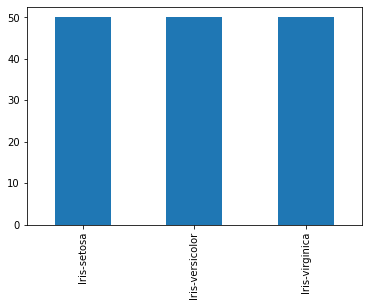

In [87]:
# 3
df['Species'].value_counts().plot(kind='bar')
plt.show()

In [88]:
# 4
print(df.groupby('Species')['Petal_Width'].mean())

Species
Iris-setosa        0.244
Iris-versicolor    1.326
Iris-virginica     2.026
Name: Petal_Width, dtype: float64


## Exercise 2.1.4 
### Filling-up a DataFrame

1. Create a DataFrame with three columns species, height and weight and add an entry to the end.
2. Create a DataFrame with the same columns and 50 empty entries. Fill-up the data frame row by row with 50 random entries.
3. Update every second entry, set the species name to M.musculus.
4. Save the DataFrame to your harddisk as a csv file. Include the header but not the row indexes.
5. Save the DataFrame as a tsv file (tab separated values).

In [89]:
df_new = pd.DataFrame(columns=['species', 'height', 'weight'])
data = pd.DataFrame([['Homo sapiens', 170, 70]], columns=['species', 'height', 'weight'])
df_new = pd.concat([df_new, data], ignore_index=True)
df_new

,species,height,weight
0,Homo sapiens,170,70


In [90]:
df2 = pd.DataFrame(np.nan, index=range(50), columns=['species', 'height', 'weight'])
for i in range(50):
    df2.loc[i] = ['Species' + str(i), np.random.randint(100, 200), np.random.randint(20, 100)]
df2

,species,height,weight
0,Species0,186.0,65.0
1,Species1,181.0,70.0
2,Species2,122.0,61.0
3,Species3,172.0,69.0
4,Species4,157.0,93.0
5,Species5,175.0,30.0
6,Species6,137.0,99.0
7,Species7,126.0,46.0
8,Species8,164.0,89.0
9,Species9,167.0,69.0


In [91]:
df2.loc[::2, 'species'] = 'M.musculus'

In [92]:
df2.to_csv('dataframe.csv', index=False)


In [93]:
df2.to_csv('dataframe.tsv', sep='\t', index=False)
